<a href="https://colab.research.google.com/github/KhurramRashid6893/NLP_UN_Debate/blob/main/Project_United_Nations_Debate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

1. Loading the dataset
2. Data Pre-processing
3. Rule 1 - Extracting the sentences with President's mention
4. Rule 2 - Extracting the mentions of initiatives
5. Rule 3 - Relation Extraction part 1
6. Rule 4 - Relation Extraction part 2
7. Combining Rule 3 and Rule 4
8. Rule 5: Patterns using Preposition

## 1. Loading the dataset

In [1]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# extract the zip file
!unzip '/content/drive/MyDrive/Colab Notebooks/NLP/UNGDC_1970-2018.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Converted sessions/Session 63 - 2008/PHL_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._PHL_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/DZA_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._DZA_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/MEX_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._MEX_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/AUT_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._AUT_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/COG_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._COG_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/CYP_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._CYP_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/SLB_63_2008.txt  

In [4]:
# folders of different sessions of speeches
!ls '/content/Converted sessions'

'Session 25 - 1970'  'Session 42 - 1987'  'Session 59 - 2004'
'Session 26 - 1971'  'Session 43 - 1988'  'Session 60 - 2005'
'Session 27 - 1972'  'Session 44 - 1989'  'Session 61 - 2006'
'Session 28 - 1973'  'Session 45 - 1990'  'Session 62 - 2007'
'Session 29 - 1974'  'Session 46 - 1991'  'Session 63 - 2008'
'Session 30 - 1975'  'Session 47 - 1992'  'Session 64 - 2009'
'Session 31 - 1976'  'Session 48 - 1993'  'Session 65 - 2010'
'Session 32 - 1977'  'Session 49 - 1994'  'Session 66 - 2011'
'Session 33 - 1978'  'Session 50 - 1995'  'Session 67 - 2012'
'Session 34 - 1979'  'Session 51 - 1996'  'Session 68 - 2013'
'Session 35 - 1980'  'Session 52 - 1997'  'Session 69 - 2014'
'Session 36 - 1981'  'Session 53 - 1998'  'Session 70 - 2015'
'Session 37 - 1982'  'Session 54 - 1999'  'Session 71 - 2016'
'Session 38 - 1983'  'Session 55 - 2000'  'Session 72 - 2017'
'Session 39 - 1984'  'Session 56 - 2001'  'Session 73 - 2018'
'Session 40 - 1985'  'Session 57 - 2002'
'Session 41 - 1986'  'Session

In [5]:
# speeches in a single folder
!ls '/content/Converted sessions/Session 25 - 1970'

ALB_25_1970.txt  GBR_25_1970.txt  LBN_25_1970.txt  SLE_25_1970.txt
ARG_25_1970.txt  GHA_25_1970.txt  LBR_25_1970.txt  SLV_25_1970.txt
AUS_25_1970.txt  GIN_25_1970.txt  LBY_25_1970.txt  SOM_25_1970.txt
AUT_25_1970.txt  GMB_25_1970.txt  LKA_25_1970.txt  SYR_25_1970.txt
BEL_25_1970.txt  GTM_25_1970.txt  MAR_25_1970.txt  TGO_25_1970.txt
BLR_25_1970.txt  HND_25_1970.txt  MDG_25_1970.txt  THA_25_1970.txt
BOL_25_1970.txt  HTI_25_1970.txt  MEX_25_1970.txt  TTO_25_1970.txt
BRA_25_1970.txt  IDN_25_1970.txt  MMR_25_1970.txt  TUN_25_1970.txt
CAN_25_1970.txt  IND_25_1970.txt  NLD_25_1970.txt  TUR_25_1970.txt
CMR_25_1970.txt  IRN_25_1970.txt  NOR_25_1970.txt  UKR_25_1970.txt
COG_25_1970.txt  IRQ_25_1970.txt  NZL_25_1970.txt  URY_25_1970.txt
COL_25_1970.txt  ISL_25_1970.txt  PAK_25_1970.txt  USA_25_1970.txt
CRI_25_1970.txt  ISR_25_1970.txt  PER_25_1970.txt  VEN_25_1970.txt
CUB_25_1970.txt  ITA_25_1970.txt  PHL_25_1970.txt  YUG_25_1970.txt
DOM_25_1970.txt  JPN_25_1970.txt  PRY_25_1970.txt  ZAF_25_1970

## 2. Data Pre-processing

In [6]:
# importing libraries
import glob
import pandas as pd
import re

In [7]:
# names of all the folders in the dataset
folders = glob.glob('/content/Converted sessions/Session*')

In [9]:
# list of folders
folders

['/content/Converted sessions/Session 34 - 1979',
 '/content/Converted sessions/Session 67 - 2012',
 '/content/Converted sessions/Session 41 - 1986',
 '/content/Converted sessions/Session 42 - 1987',
 '/content/Converted sessions/Session 32 - 1977',
 '/content/Converted sessions/Session 59 - 2004',
 '/content/Converted sessions/Session 43 - 1988',
 '/content/Converted sessions/Session 28 - 1973',
 '/content/Converted sessions/Session 48 - 1993',
 '/content/Converted sessions/Session 31 - 1976',
 '/content/Converted sessions/Session 47 - 1992',
 '/content/Converted sessions/Session 71 - 2016',
 '/content/Converted sessions/Session 63 - 2008',
 '/content/Converted sessions/Session 53 - 1998',
 '/content/Converted sessions/Session 54 - 1999',
 '/content/Converted sessions/Session 73 - 2018',
 '/content/Converted sessions/Session 52 - 1997',
 '/content/Converted sessions/Session 27 - 1972',
 '/content/Converted sessions/Session 46 - 1991',
 '/content/Converted sessions/Session 55 - 2000',


In [10]:
# creating a Dataframe to store the speeches
df = pd.DataFrame(columns=['Country','Speech','Session','Year'])

In [11]:
# read speeches by USA
i = 0
# for each folder
for file in folders:
    # getting the txt file containing speech of USA
    speech = glob.glob(file+'/USA*.txt')
    # reading the txt file
    with open(speech[0],encoding='utf8') as f:
        # reading the speech
        df.loc[i,'Speech'] = f.read()
        # extracting the year of speech
        df.loc[i,'Year'] = speech[0].split('_')[-1].split('.')[0]
        # extracting the session
        df.loc[i,'Session'] = speech[0].split('_')[-2]
        # storing the country name
        df.loc[i,'Country'] = speech[0].split('_')[0].split("/")[-1]
        # Increment counter
        i += 1

In [12]:
# first 5 rows of the created dataset
df.head()

,Country,Speech,Session,Year
0,USA,﻿We meet in this General Assembly on the thres...,34,1979
1,USA,﻿I would like to begin today by\ntelling the A...,67,2012
2,USA,A short walk from this Hall is the delegates' ...,41,1986
3,USA,﻿Let me first welcome the Secretary-General ba...,42,1987
4,USA,"﻿1.\t Mr. President, I wish to offer you my co...",32,1977


In [13]:
# sample speech from the dataset
df['Speech'][2]

'A short walk from this Hall is the delegates\' Meditation Room, a refuge from a world deafened by the noise of strife and violence. "We want to bring back the idea of worship", Dag Haramarskjold once said about this room, "devotion to something which is greater and higher than we are ourselves".\nIt is just such devotion that gave birth to the United Nations: devotion to the dream of world peace and freedom, of human rights and democratic self-determination, of a time when, in those ancient words, "... they shall beat their swords into plowshares ... nation shall not lift up sword against nation, neither shall they learn war any more".\nThe United States remains committed to the United Nations. For over 40 years, this Organization has provided an international forum for harmonizing conflicting national interests and has made a significant contribution in such fields as peace-keeping, humanitarian assistance, and eradicating disease. Yet, no one knows better than those in this Hall how

In [14]:
# function to preprocess speech
def clean(text):
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))

    return text

<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\('
<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-1539467913.py:16: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub("Mr\.",'Mr',str(text))
/tmp/ipython-input-1539467913.py:17: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub("Mrs\.",'Mrs',str(text))
/tmp/ipython-input-1539467913.py:19: SyntaxWarning: invalid escape sequence '\('
  text = re.sub("[\(\[].*?[\)\]]", "", str(text))


In [15]:
# preprocessing speeches
df['Speech_clean'] = df['Speech'].apply(clean)

In [16]:
# first 5 rows of the dataset
df.head()

,Country,Speech,Session,Year,Speech_clean
0,USA,﻿We meet in this General Assembly on the thres...,34,1979,﻿We meet in this General Assembly on the thres...
1,USA,﻿I would like to begin today by\ntelling the A...,67,2012,﻿I would like to begin today by telling the As...
2,USA,A short walk from this Hall is the delegates' ...,41,1986,A short walk from this Hall is the delegates' ...
3,USA,﻿Let me first welcome the Secretary-General ba...,42,1987,﻿Let me first welcome the Secretary General ba...
4,USA,"﻿1.\t Mr. President, I wish to offer you my co...",32,1977,"﻿ Mr President, I wish to offer you my congrat..."


In [17]:
# sample cleaned speech
df['Speech_clean'][1]

'\ufeffI would like to begin today by telling the Assembly about an American named Chris Stevens. Chris was born in a town called Grass Valley, California, the son of a lawyer and a musician. As a young man, Chris joined the Peace Corps and taught English in Morocco, and he came to love and respect the people of North Africa and the Middle East. He would carry that commitment throughout his life. As a diplomat, he worked from Egypt to Syria, from Saudi Arabia to Libya. He was known for walking the streets of the cities where he worked, tasting the local food, meeting as many people as he could, speaking Arabic, listening with a broad smile. Chris went to Benghazi, arriving on a cargo ship, in the early days of the Libyan revolution. As America’s representative, he helped the Libyan people as they coped with violent conflict, cared for the wounded and crafted a vision for the future in which the rights of all Libyans would be respected. After the revolution, he supported the birth of a 

In [18]:
# splitting sentences
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [19]:
# creating a new column to store the sentences
df['Sentence'] = df['Speech_clean'].apply(sentences)

In [20]:
# first 5 rows
df.head()

,Country,Speech,Session,Year,Speech_clean,Sentence
0,USA,﻿We meet in this General Assembly on the thres...,34,1979,﻿We meet in this General Assembly on the thres...,[﻿We meet in this General Assembly on the thre...
1,USA,﻿I would like to begin today by\ntelling the A...,67,2012,﻿I would like to begin today by telling the As...,[﻿I would like to begin today by telling the A...
2,USA,A short walk from this Hall is the delegates' ...,41,1986,A short walk from this Hall is the delegates' ...,[A short walk from this Hall is the delegates'...
3,USA,﻿Let me first welcome the Secretary-General ba...,42,1987,﻿Let me first welcome the Secretary General ba...,[﻿Let me first welcome the Secretary General b...
4,USA,"﻿1.\t Mr. President, I wish to offer you my co...",32,1977,"﻿ Mr President, I wish to offer you my congrat...","[﻿ Mr President, I wish to offer you my congra..."


In [21]:
# sample sentence list from the dataset
df['Sentence'][1]

['\ufeffI would like to begin today by telling the Assembly about an American named Chris Stevens',
 ' Chris was born in a town called Grass Valley, California, the son of a lawyer and a musician',
 ' As a young man, Chris joined the Peace Corps and taught English in Morocco, and he came to love and respect the people of North Africa and the Middle East',
 ' He would carry that commitment throughout his life',
 ' As a diplomat, he worked from Egypt to Syria, from Saudi Arabia to Libya',
 ' He was known for walking the streets of the cities where he worked, tasting the local food, meeting as many people as he could, speaking Arabic, listening with a broad smile',
 ' Chris went to Benghazi, arriving on a cargo ship, in the early days of the Libyan revolution',
 ' As America’s representative, he helped the Libyan people as they coped with violent conflict, cared for the wounded and crafted a vision for the future in which the rights of all Libyans would be respected',
 ' After the revolut

In [22]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['Sentence','Year','Len'])

row_list = []

# for each speech
for i in range(len(df)):
    # for each sentence
    for sent in df.loc[i,'Sentence']:

        # calculating the word count in a sentence
        wordcount = len(sent.split())
        # extracting the year of speech
        year = df.loc[i,'Year']

        dict1 = {'Year':year,'Sentence':sent,'Len':wordcount}
        row_list.append(dict1)

df2 = pd.DataFrame(row_list)

In [23]:
# first 5 rows
df2.head()

,Year,Sentence,Len
0,1979,﻿We meet in this General Assembly on the thres...,13
1,1979,"It will be a time of complex challenge, a per...",33
2,1979,The decade now drawing to a close has been ch...,17
3,1979,Awesome technological developments are all ab...,7
4,1979,The assertion of national independence has re...,13


In [24]:
# shape of the dataset
df2.shape

(8948, 3)

Sample sentences from dataset:

1.  For that reason, **President Reagan**, in his speech to this body last year, proposed that the United States and the Soviet Union exchange visits of experts at test sites to measure directly the yields of nuclear weapon test
2.  **President Reagan** has directed our scientists and engineers to examine, in the light of new technologies and fully in accord with the Anti Ballistic Missile Treaty   the feasibility of defense against ballistic missile attack
3.   **President Reagan** approach to foreign policy is  grounded squarely on standards drawn from the  pragmatic American experience
4.  Let me start by joining the **President of Brazil** in conveying to the people and Government of Mexico our deep sympathy over the devastation wrought by earthquakes and our solidarity with them as they work to recover and rebuild

## 3. Rule 1 - Extracting the sentences with President's mention

In [25]:
# importing spacy and its matcher function
import spacy
from spacy.matcher import Matcher

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [26]:
# function to find sentences mentioning president
def find_names(text):

    names = []

    # spacy doc
    doc = nlp(text)

    # pattern
    pattern = [{'LOWER':'president'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]

    # Matcher class object
    matcher = Matcher(nlp.vocab)
    matcher.add("names",[pattern])

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):

        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))

    return names

In [27]:
# extracting sentences with president's mentions
extracted_sentences = []
for i in range(df2.shape[0]):
    extracted_sentences.append(find_names(df2['Sentence'][i]))

# storing the extracted sentences in the dataframe
df2['President_Names'] = extracted_sentences

In [28]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names
0,1979,﻿We meet in this General Assembly on the thres...,13,[]
1,1979,"It will be a time of complex challenge, a per...",33,[]
2,1979,The decade now drawing to a close has been ch...,17,[]
3,1979,Awesome technological developments are all ab...,7,[]
4,1979,The assertion of national independence has re...,13,[]


In [29]:
# extracting only the non-null outputs
mention = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        mention.append(df2['President_Names'][i])

mention

[['President Carter'],
 ['President Mondaleat'],
 ['President in Somalia'],
 ['President Sarney'],
 ['President of Iran'],
 ['President Nixon'],
 ['President Nixon'],
 ['President of Mexico'],
 ['President de'],
 ['President Kennedy'],
 ['President Roosevelt'],
 ['President Al'],
 ['President Gore'],
 ['President Ford'],
 ['President of Lebanon'],
 ['President Ford'],
 ['President Harry'],
 ['President Yeltsin'],
 ['President Moon', 'President Xi'],
 ['President Moon'],
 ['President Xi'],
 ['President Monroe'],
 ['President Mugabe'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President C1inton'],
 ['President Clinton'],
 ['President Dwight'],
 ['President Kennedy'],
 ['President Abraham'],
 ['President Carter'],
 ['President Carter'],
 ['President Carter'],
 ['President Nixon'],
 ['President Nasser'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Abbas'],
 ['President in Colombia'],
 

In [30]:
# extracting only those sentences which has president's mention
sentences_president = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        sentences_president.append(df2['Sentence'][i])

sentences_president

[' President Carter has committed the United States not to import more than 8',
 ' The proposal made by Vice President Mondaleat the Geneva Meeting for a refugee resettlement fund reflects our belief that the international community should deal on a global basis with a global and grave refugee crisis',
 ' Over the past year, we have seen peaceful transitions of power in Malawi and Senegal and a new President in Somalia',
 ' President Sarney of Brazil spoke for many others when he said that Private initiative is the engine of economic Development',
 ' In that regard, I know that the President of Iran will be addressing representatives tomorrow',
 ' That President Nixon should ask me as my first official act to speak here for the United States reaffirms the importance that my country attaches to the values and the ideals of the United Nations',
 ' President Nixon has met with the leaders of that great nation; we have agreed to a historic communique  that honestly sets forth both our diff

In [31]:
# number of sentences containing president's mention
len(sentences_president)

107

In [32]:
# sample sentences with president's mention
sentences_president[1]

' The proposal made by Vice President Mondaleat the Geneva Meeting for a refugee resettlement fund reflects our belief that the international community should deal on a global basis with a global and grave refugee crisis'

In [33]:
# sample sentences with president's mention
sentences_president[10]

' But I agree with President Roosevelt, who once said: The democratic aspiration is no mere recent phase of human history'

Sample sentences from dataset:
1. The United States will continue its strong efforts to advance **the United Nations plan** for Namibia
2. The United States and Italy have proposed **a Global Peace Operations Initiative**
3. For 35 years, **the North Atlantic alliance** has guaranteed the peace in Europe

## 4. Rule 2 - Extracting the mentions of initiatives

In [37]:
# to check if keyswords like 'programs','schemes', etc. are present in sentences

def prog_sent(text):

    patterns = [r'(?i)\b'+'plan'+r'\b',
               r'(?i)\b'+'programme'+r'\b',
               r'(?i)\b'+'scheme'+r'\b',
               r'(?i)\b'+'campaign'+r'\b',
               r'(?i)\b'+'initiative'+r'\b',
               r'(?i)\b'+'conference'+r'\b',
               r'(?i)\b'+'agreement'+r'\b',
               r'(?i)\b'+'alliance'+r'\b']

    output = []
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag

# apply function
df2['Check_Schemes'] = df2['Sentence'].apply(prog_sent)

In [38]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes
0,1979,﻿We meet in this General Assembly on the thres...,13,[],0
1,1979,"It will be a time of complex challenge, a per...",33,[],0
2,1979,The decade now drawing to a close has been ch...,17,[],0
3,1979,Awesome technological developments are all ab...,7,[],0
4,1979,The assertion of national independence has re...,13,[],0


In [39]:
# to extract initiatives using pattern matching
def all_schemes(text,check):

    schemes = []

    doc = nlp(text)

    # initiatives
    prog_list = ['programme','scheme',
                 'initiative','campaign',
                 'agreement','conference',
                 'alliance','plan']

    # pattern to match initiatives names
    pattern = [{'POS':'DET'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'LOWER':{'IN':prog_list},'OP':'+'}
              ]

    if check == 0:
        # return blank list
        return schemes

    # Matcher class object
    matcher = Matcher(nlp.vocab)
    matcher.add("matching", [pattern])
    matches = matcher(doc)

    for i in range(0,len(matches)):

        # match: id, start, end
        start, end = matches[i][1], matches[i][2]

        if doc[start].pos_=='DET':
            start = start+1

        # matched string
        span = str(doc[start:end])

        if (len(schemes)!=0) and (schemes[-1] in span):
            schemes[-1] = span
        else:
            schemes.append(span)

    return schemes

# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sentence,x.Check_Schemes),axis=1)

In [40]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes,Schemes1
0,1979,﻿We meet in this General Assembly on the thres...,13,[],0,[]
1,1979,"It will be a time of complex challenge, a per...",33,[],0,[]
2,1979,The decade now drawing to a close has been ch...,17,[],0,[]
3,1979,Awesome technological developments are all ab...,7,[],0,[]
4,1979,The assertion of national independence has re...,13,[],0,[]


In [41]:
df2.shape

(8948, 6)

In [42]:
# extracting only the non-null outputs
mention = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        mention.append(df2['Schemes1'][i])

mention

[['Second Review Conference'],
 ['United Nations Conference'],
 ['World Bank programme'],
 ['Geneva Peace Conference'],
 ['Global Peace Operations Initiative'],
 ['San Francisco Conference'],
 ['North American Free Trade Agreement'],
 ['Geneva Peace Conference'],
 ['North American Free Trade Agreement'],
 ['San Francisco Conference'],
 ['Good Friday Agreement'],
 ['United Nations Development Programme', 'World Food Programme'],
 ['African Crisis Response Initiative'],
 ['Bonn Economic Summit Conference'],
 ['Bonn Economic Summit Conference'],
 ['World Food Conference'],
 ['World Food Conference'],
 ['United Nations Conference'],
 ['United States initiative'],
 ['United Nations Conference'],
 ['World Food Programme'],
 ['Proliferation Security Initiative'],
 ['Arab Peace Initiative'],
 ['World Food Conference'],
 ['World Population Conference', 'World Food Conference'],
 ['North American Free Trade Agreement'],
 ['United Nations plan'],
 ['United Nations plan'],
 ['North Atlantic allian

In [43]:
# extracting sentences which mentions some initiatives
initiatives = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        initiatives.append(df2['Sentence'][i])

initiatives

[' The Second Review Conference of the Parties to the Treaty on the Non  Proliferation of Nuclear Weapons, to be held next year, will be a critical time for taking stock—and for redoubling our efforts to make progress on this urgent international priority',
 ' This Institute will work for the goals set by the United Nations Conference on Science and Technology for Development',
 ' We are supporting the expansion of the World Bank programme for the exploration and development of mineral fuels',
 ' We are staying in close contact with the Soviet Union, with which we share responsibility for reconvening the Geneva Peace Conference on the Middle East',
 ' The United States and Italy have proposed a Global Peace Operations Initiative',
 ' Like most of the people in the world today, I was not even alive during the convulsive world war that convinced humankind of the need for this Organization, nor during the San Francisco Conference that led to its birth',
 ' We will work to strengthen the f

In [44]:
# number of sentences which mentions some initiatives
len(initiatives)

40

In [45]:
# sample sentences containing initiatives
initiatives[0]

' The Second Review Conference of the Parties to the Treaty on the Non  Proliferation of Nuclear Weapons, to be held next year, will be a critical time for taking stock—and for redoubling our efforts to make progress on this urgent international priority'

In [46]:
# sample sentences containing initiatives
initiatives[3]

' We are staying in close contact with the Soviet Union, with which we share responsibility for reconvening the Geneva Peace Conference on the Middle East'

## 5. Rule 3 - Relation Extraction part 1

Sample sentences from dataset:
1.   The United **States** will **support** these **principles**
2.    Yet these very small **entities need** more than most the **assistance** that the United Nations system can provide
3.  I have proposed to Congress that the United **States provide** additional **funding** for our work in Iraq, the greatest financial commitment of its kind since the Marshall Plan

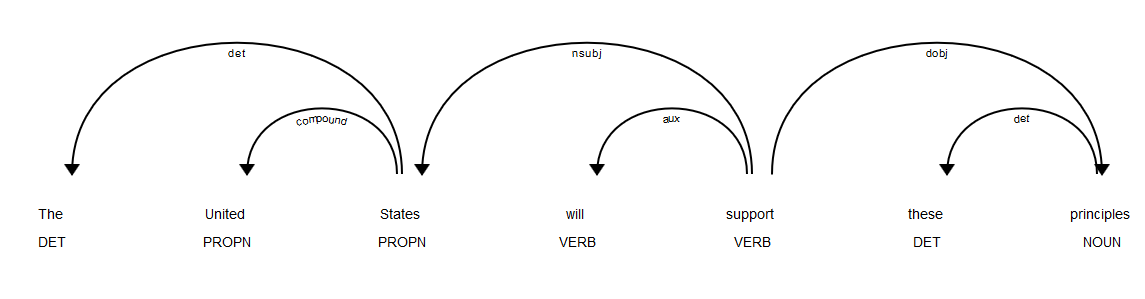

In [47]:
# function for rule 3: noun(subject), verb, noun(object)
def rule3(text):

    doc = nlp(text)

    sent = []

    for token in doc:

        # if the token is a verb
        if (token.pos_=='VERB'):

            phrase =''

            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:

                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):

                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:

                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):

                            phrase += ' '+sub_tok.text
                            sent.append(phrase)

    return sent

In [48]:
# create a df containing sentence and its output for rule 3
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule3 = pd.DataFrame(row_list)

In [49]:
# first 5 rows
df_rule3.head()

,Year,Sentence,Output
0,1979,﻿We meet in this General Assembly on the thres...,[]
1,1979,"It will be a time of complex challenge, a per...",[]
2,1979,The decade now drawing to a close has been ch...,[]
3,1979,Awesome technological developments are all ab...,[]
4,1979,The assertion of national independence has re...,[assertion reshape geography]


In [53]:
# selecting non-empty output rows
df_show = pd.DataFrame(columns=df_rule3.columns)

row_list_show = []
for row in range(len(df_rule3)):

    if len(df_rule3.loc[row,'Output'])!=0:
        row_list_show.append(df_rule3.loc[row,:])

df_show = pd.concat(row_list_show, axis=1).T


# reset the index
df_show.reset_index(inplace=True, drop=True)

In [54]:
df_show.head()

,Year,Sentence,Output
0,1979,The assertion of national independence has re...,[assertion reshape geography]
1,1979,Within nations we see an accelerating rise in...,[we see rise]
2,1979,The unrelenting hostility of the cold war has...,[hostility give way]
3,1979,The world economic order is also undergoing i...,[order undergo transformations]
4,1979,Many nations formerly among the disadvantaged...,[nations achieve power]


In [55]:
# number of outputs
df_show.shape

(4006, 3)

In [56]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):

    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']

    # iterating over all the outputs from the sentence
    for sent in output:

        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]

        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)

        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [57]:
# first 5 rows
df_sep.head()

,Sentence,Year,Noun1,Verb,Noun2
0,The assertion of national independence has re...,1979,[assertion],reshape,[geography]
1,Within nations we see an accelerating rise in...,1979,[we],see,[rise]
2,The unrelenting hostility of the cold war has...,1979,[hostility],give,[way]
3,The world economic order is also undergoing i...,1979,[order],undergo,[transformations]
4,Many nations formerly among the disadvantaged...,1979,[nations],achieve,[power]


In [58]:
# top 10 verbs
df_sep['Verb'].value_counts()[:10]

,count
Verb,
have,348
take,161
make,138
support,96
give,93
see,85
face,57
provide,55
seek,54


In [59]:
# selecting a verb and looking at its patterns
df_sep[df_sep['Verb']=='support'].head(15)

,Sentence,Year,Noun1,Verb,Noun2
41,The United States strongly supports the basic...,1979,[States],support,[elements]
61,We are supporting the expansion of the World ...,1979,[We],support,[expansion]
82,We support that recommendation,1979,[We],support,[recommendation]
84,We support proposals to double the resources ...,1979,[We],support,[proposals]
106,"After the revolution, he supported the birth ...",2012,[he],support,[birth]
121,"Since then, the world has been captivated by ...",2012,[States],support,[forces]
124,"We supported change in Egypt, because our sup...",2012,[We],support,[change]
148,We do not do so because we support hateful sp...,2012,[we],support,[speech]
323,The United States fully supports implementati...,1987,[States],support,[implementation]
324,The United States fully supports implementati...,1987,[we],support,[mission]


## 6. Rule 4: Relation Extraction part 2

Sample sentences from the dataset:
1.  With support from **many countries**, we have made **impressive progress**
2.  Because of their **unique expertise** and regional legitimacy, they can be instruments for solving some of the **hardest challenges** we face
3.  We are right to aim high and take on the **mightiest tasks**

In [60]:
from spacy import displacy
displacy.render(nlp("With support from many countries, we have made impressive progress"), style='dep',jupyter=True)

In [61]:
# function for rule 4
def rule4(text):

    doc = nlp(text)

    pat = []

    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):

            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '

            if len(phrase)!=0:
                phrase += token.text

        if  len(phrase)!=0:
            pat.append(phrase)


    return pat

In [62]:
# create a df containing sentence and its output for rule 4
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    # rule
    output = rule4(sent)

    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule4 = pd.DataFrame(row_list)

In [63]:
# first 5 rows
df_rule4.head()

,Year,Sentence,Output
0,1979,﻿We meet in this General Assembly on the thres...,[new decade]
1,1979,"It will be a time of complex challenge, a per...","[complex challenge, operative endeavours, dire..."
2,1979,The decade now drawing to a close has been ch...,[rapid reaching change]
3,1979,Awesome technological developments are all ab...,[Awesome technological developments]
4,1979,The assertion of national independence has re...,"[national independence, political geography]"


In [65]:
# selecting non-empty outputs
df_show = pd.DataFrame(columns=df_rule4.columns)

row_list_show = []

for row in range(len(df_rule4)):

    if len(df_rule4.loc[row,'Output'])!=0:
        row_list_show.append(df_rule4.loc[row,:])

df_show = pd.concat(row_list_show, axis=1).T


# reset the index
df_show.reset_index(inplace=True, drop=True)

In [66]:
# number of matches
df_show.shape

(6206, 3)

In [67]:
# first 15 rows
df_show.head(15)

,Year,Sentence,Output
0,1979,﻿We meet in this General Assembly on the thres...,[new decade]
1,1979,"It will be a time of complex challenge, a per...","[complex challenge, operative endeavours, dire..."
2,1979,The decade now drawing to a close has been ch...,[rapid reaching change]
3,1979,Awesome technological developments are all ab...,[Awesome technological developments]
4,1979,The assertion of national independence has re...,"[national independence, political geography]"
5,1979,Within nations we see an accelerating rise in...,[individual economic expectations]
6,1979,The unrelenting hostility of the cold war has...,"[unrelenting hostility, cold war, complex rela..."
7,1979,The simple notion of a bipolar world has beco...,"[simple notion, bipolar world]"
8,1979,Increasingly there is a profusion of differen...,"[different systems, political power]"
9,1979,The world economic order is also undergoing i...,"[economic order, inexorable transformations]"


### 7. Combining Rule 3 and Rule 4

Sample sentences:
1.  With support from many countries, **we** have **made impressive progress**
2. **It** will **require military planners** the world over to recognize that training for peace operations is a legitimate part of every nation security strategy

In [68]:
# modifying rule 4
def rule4_mod(text,index):

    doc = nlp(text)

    phrase = ''

    # iterate over tokens
    for token in doc:

        if token.i == index:

            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += ' '+subtoken.text
            break

    return phrase

In [69]:
# using rule 3 and rule 4
def rule3_mod(text):

    doc = nlp(text)

    sent = []

    for token in doc:
        # root word
        if (token.pos_=='VERB'):

            phrase =''

            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:

                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):

                    # look for subject modifier
                    adj = rule4_mod(text,sub_tok.i)

                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:

                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):

                            # look for object modifier
                            adj = rule4_mod(text,sub_tok.i)

                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)

    return sent

In [70]:
# create a df containing sentence and its output for modified rule
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3_mod(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [71]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,1979,﻿We meet in this General Assembly on the thres...,[]
1,1979,"It will be a time of complex challenge, a per...",[]
2,1979,The decade now drawing to a close has been ch...,[]
3,1979,Awesome technological developments are all ab...,[]
4,1979,The assertion of national independence has re...,[ assertion reshape political geography]


In [73]:
# selecting non-empty outputs
df_show_mod = pd.DataFrame(columns=df_rule.columns)

row_list = []

for row in range(len(df_rule)):

    if len(df_rule.loc[row,'Output'])!=0:
        row_list.append(df_rule.loc[row,:])

df_show_mod = pd.concat(row_list, axis=1).T

# reset the index
df_show_mod.reset_index(inplace=True, drop=True)

In [74]:
# number of matches
df_show_mod.shape

(4006, 3)

In [75]:
# first 15 rows
df_show_mod.head(20)

,Year,Sentence,Output
0,1979,The assertion of national independence has re...,[ assertion reshape political geography]
1,1979,Within nations we see an accelerating rise in...,[ we see rise]
2,1979,The unrelenting hostility of the cold war has...,[ unrelenting hostility give way]
3,1979,The world economic order is also undergoing i...,[ economic order undergo inexorable transforma...
4,1979,Many nations formerly among the disadvantaged...,[ Many nations achieve global economic power]
5,1979,The next decade will decide whether we have t...,[ we have collective wisdom]
6,1979,The need to develop new forms of energy will ...,[ need pose challenge]
7,1979,We have entered the difficult transition from...,[ We enter difficult transition]
8,1979,"Even without this added burden, we face an im...",[ we face imposing task]
9,1979,We must strike a decent balance between the b...,[ We strike decent balance]


In [76]:
# Sample sentence
print(df_show_mod.loc[4,'Output'])
print(df_show_mod.loc[4,'Sentence'])

[' Many nations achieve global economic power']
 Many nations formerly among the disadvantaged are now achieving global economic power


In [77]:
# Sample sentence
print(df_show_mod.loc[17,'Output'])
print(df_show_mod.loc[17,'Sentence'])

[' severity drive nations']
 The severity of the problems we face could drive nations to the pursuit of their own separate advantage at the expense of international co operation


## 8. Rule 5: Patterns using Preposition

Sample sentences:
1.  We all believe the **benefits of globalization** must be allocated more broadly within and among societies
2. As the Millennium Summit reflected, we have no **shortage of** worthy **goals**
3. It should preserve the special **responsibility for peacekeeping** of the Security Council permanent members

In [78]:


# Sample sentence
from spacy import displacy
displacy.render(nlp('''We all believe the benefits of globalization must
be allocated more broadly within and among societies'''),
                style='dep',jupyter=True)

In [79]:
# rule 5 function
def rule5(text):

    doc = nlp(text)

    sent = []

    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''

            # if its head word is a noun
            if token.head.pos_=='NOUN':

                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text

                if len(phrase)>2:
                    sent.append(phrase)

    return sent

In [80]:
# create a df containing sentence and its output for rule 5
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']

    # rule
    output = rule5(sent)

    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [81]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,1979,﻿We meet in this General Assembly on the thres...,[threshold of decade]
1,1979,"It will be a time of complex challenge, a per...","[time of challenge, endeavours among nations, ..."
2,1979,The decade now drawing to a close has been ch...,[]
3,1979,Awesome technological developments are all ab...,[]
4,1979,The assertion of national independence has re...,"[assertion of independence, geography of planet]"


In [83]:
# select non-empty outputs
df_show = pd.DataFrame(columns=df_rule.columns)

row_list = []

for row in range(len(df_rule)):

    if len(df_rule.loc[row,'Output'])!=0:
        row_list.append(df_rule.loc[row,:])

df_show = pd.concat(row_list, axis=1).T

# reset the index
df_show.reset_index(inplace = True, drop = True)

In [84]:
# first 5 rows
df_show.head()

,Year,Sentence,Output
0,1979,﻿We meet in this General Assembly on the thres...,[threshold of decade]
1,1979,"It will be a time of complex challenge, a per...","[time of challenge, endeavours among nations, ..."
2,1979,The assertion of national independence has re...,"[assertion of independence, geography of planet]"
3,1979,Within nations we see an accelerating rise in...,[rise in expectations]
4,1979,The unrelenting hostility of the cold war has...,"[hostility of war, relationship between East, ..."


In [85]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):

    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']

    # iterating over all the outputs from the sentence
    for sent in output:

        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]

        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)

        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep= pd.DataFrame(dis_list)

In [86]:
# first 10 rows
df_sep.head(10)

,Sentence,Year,Noun1,Preposition,Noun2
0,﻿We meet in this General Assembly on the thres...,1979,threshold,of,[decade]
1,"It will be a time of complex challenge, a per...",1979,time,of,[challenge]
2,"It will be a time of complex challenge, a per...",1979,endeavours,among,[nations]
3,"It will be a time of complex challenge, a per...",1979,matter,of,[idealism]
4,The assertion of national independence has re...,1979,assertion,of,[independence]
5,The assertion of national independence has re...,1979,geography,of,[planet]
6,Within nations we see an accelerating rise in...,1979,rise,in,[expectations]
7,The unrelenting hostility of the cold war has...,1979,hostility,of,[war]
8,The unrelenting hostility of the cold war has...,1979,relationship,between,[East]
9,The unrelenting hostility of the cold war has...,1979,relationship,with,[elements]


In [87]:
# top 10 prepositions
df_sep['Preposition'].value_counts()[:10]

,count
Preposition,
of,6085
in,1185
for,860
to,554
on,367
with,244
between,201
from,143
as,130


In [88]:
# selecting a preposition and looking at its patterns
df_sep[df_sep['Preposition'] == 'against'].head(10)

,Sentence,Year,Noun1,Preposition,Noun2
98,The United States strongly supports the basic...,1979,elements,against,[taking]
126,Developments in recent years can bring new im...,1979,use,against,[States]
338,"Like me, the majority of Americans are Christ...",2012,blasphemy,against,[beliefs]
344,"We do so because, given the power of faith in...",2012,weapon,against,[speech]
396,Let us condemn incitement against Sufi Muslim...,2012,incitement,against,[Muslims]
465,nation shall not lift up sword against nation...,1986,sword,against,[nation]
500,I refer here to a particularly disturbing exa...,1986,transgressions,against,[rights]
512,The threat does not come from defensive syste...,1986,shield,against,[attack]
544,When the United States began work technology ...,1986,defense,against,[missiles]
592,I pointed out how difficult it is for the Uni...,1986,war,against,[people]
